In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df= pd.read_csv('data_train.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_CONT_MOBILE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,1,Laborers,1.0,2,2,WEDNESDAY,10,0,Business Entity Type 3,0.262949
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1,Core staff,2.0,1,1,MONDAY,11,0,School,0.622246
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,1,Laborers,1.0,2,2,MONDAY,9,0,Government,0.555912
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,1,Laborers,2.0,2,2,WEDNESDAY,17,0,Business Entity Type 3,0.650442
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,1,Core staff,1.0,2,2,THURSDAY,11,0,Religion,0.322738


In [23]:
df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT               0
R

In [5]:
df.shape

(307511, 33)

In [6]:
null = df.isnull().sum()
ratio =null /df.shape[0]
pd.DataFrame({'null':null,'ratio':ratio}).T

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_CONT_MOBILE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2
null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.000000,...,0.0,96391.000000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,660.000000
ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000039,...,0.0,0.313455,0.000007,0.0,0.0,0.0,0.0,0.0,0.0,0.002146


In [7]:
dtypes=df.dtypes
n_unique=df.nunique()
pd.DataFrame({'dtypes':dtypes,"num_unique":n_unique}).T

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_CONT_MOBILE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2
dtypes,int64,int64,object,object,object,object,int64,float64,float64,float64,...,int64,object,float64,int64,int64,object,int64,int64,object,float64
num_unique,307511,2,2,3,2,2,15,2548,5603,13672,...,2,18,17,3,3,7,24,2,58,119831


In [25]:
df['AMT_ANNUITY'].fillna(df['AMT_ANNUITY'].mode()[0], inplace=True)

C:\Users\Incorta\AppData\Local\Temp\ipykernel_8504\4192769526.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AMT_ANNUITY'].fillna(df['AMT_ANNUITY'].mode()[0], inplace=True)


In [26]:
df["CNT_FAM_MEMBERS"].fillna(df["CNT_FAM_MEMBERS"].mode()[0], inplace=True)

C:\Users\Incorta\AppData\Local\Temp\ipykernel_8504\1213356160.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["CNT_FAM_MEMBERS"].fillna(df["CNT_FAM_MEMBERS"].mode()[0], inplace=True)


In [27]:
df['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].mode()[0], inplace=True)

C:\Users\Incorta\AppData\Local\Temp\ipykernel_8504\4292258107.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].mode()[0], inplace=True)


In [28]:
df['NAME_TYPE_SUITE'].fillna(df['NAME_TYPE_SUITE'].mode()[0], inplace=True)

C:\Users\Incorta\AppData\Local\Temp\ipykernel_8504\942800478.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NAME_TYPE_SUITE'].fillna(df['NAME_TYPE_SUITE'].mode()[0], inplace=True)


In [29]:
df['OCCUPATION_TYPE'].fillna(df['OCCUPATION_TYPE'].mode()[0], inplace=True)

C:\Users\Incorta\AppData\Local\Temp\ipykernel_8504\1701422214.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['OCCUPATION_TYPE'].fillna(df['OCCUPATION_TYPE'].mode()[0], inplace=True)


In [30]:
df['EXT_SOURCE_2'].fillna(df['EXT_SOURCE_2'].mode()[0], inplace=True)

C:\Users\Incorta\AppData\Local\Temp\ipykernel_8504\124340790.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['EXT_SOURCE_2'].fillna(df['EXT_SOURCE_2'].mode()[0], inplace=True)


In [31]:
df.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_CITY_N

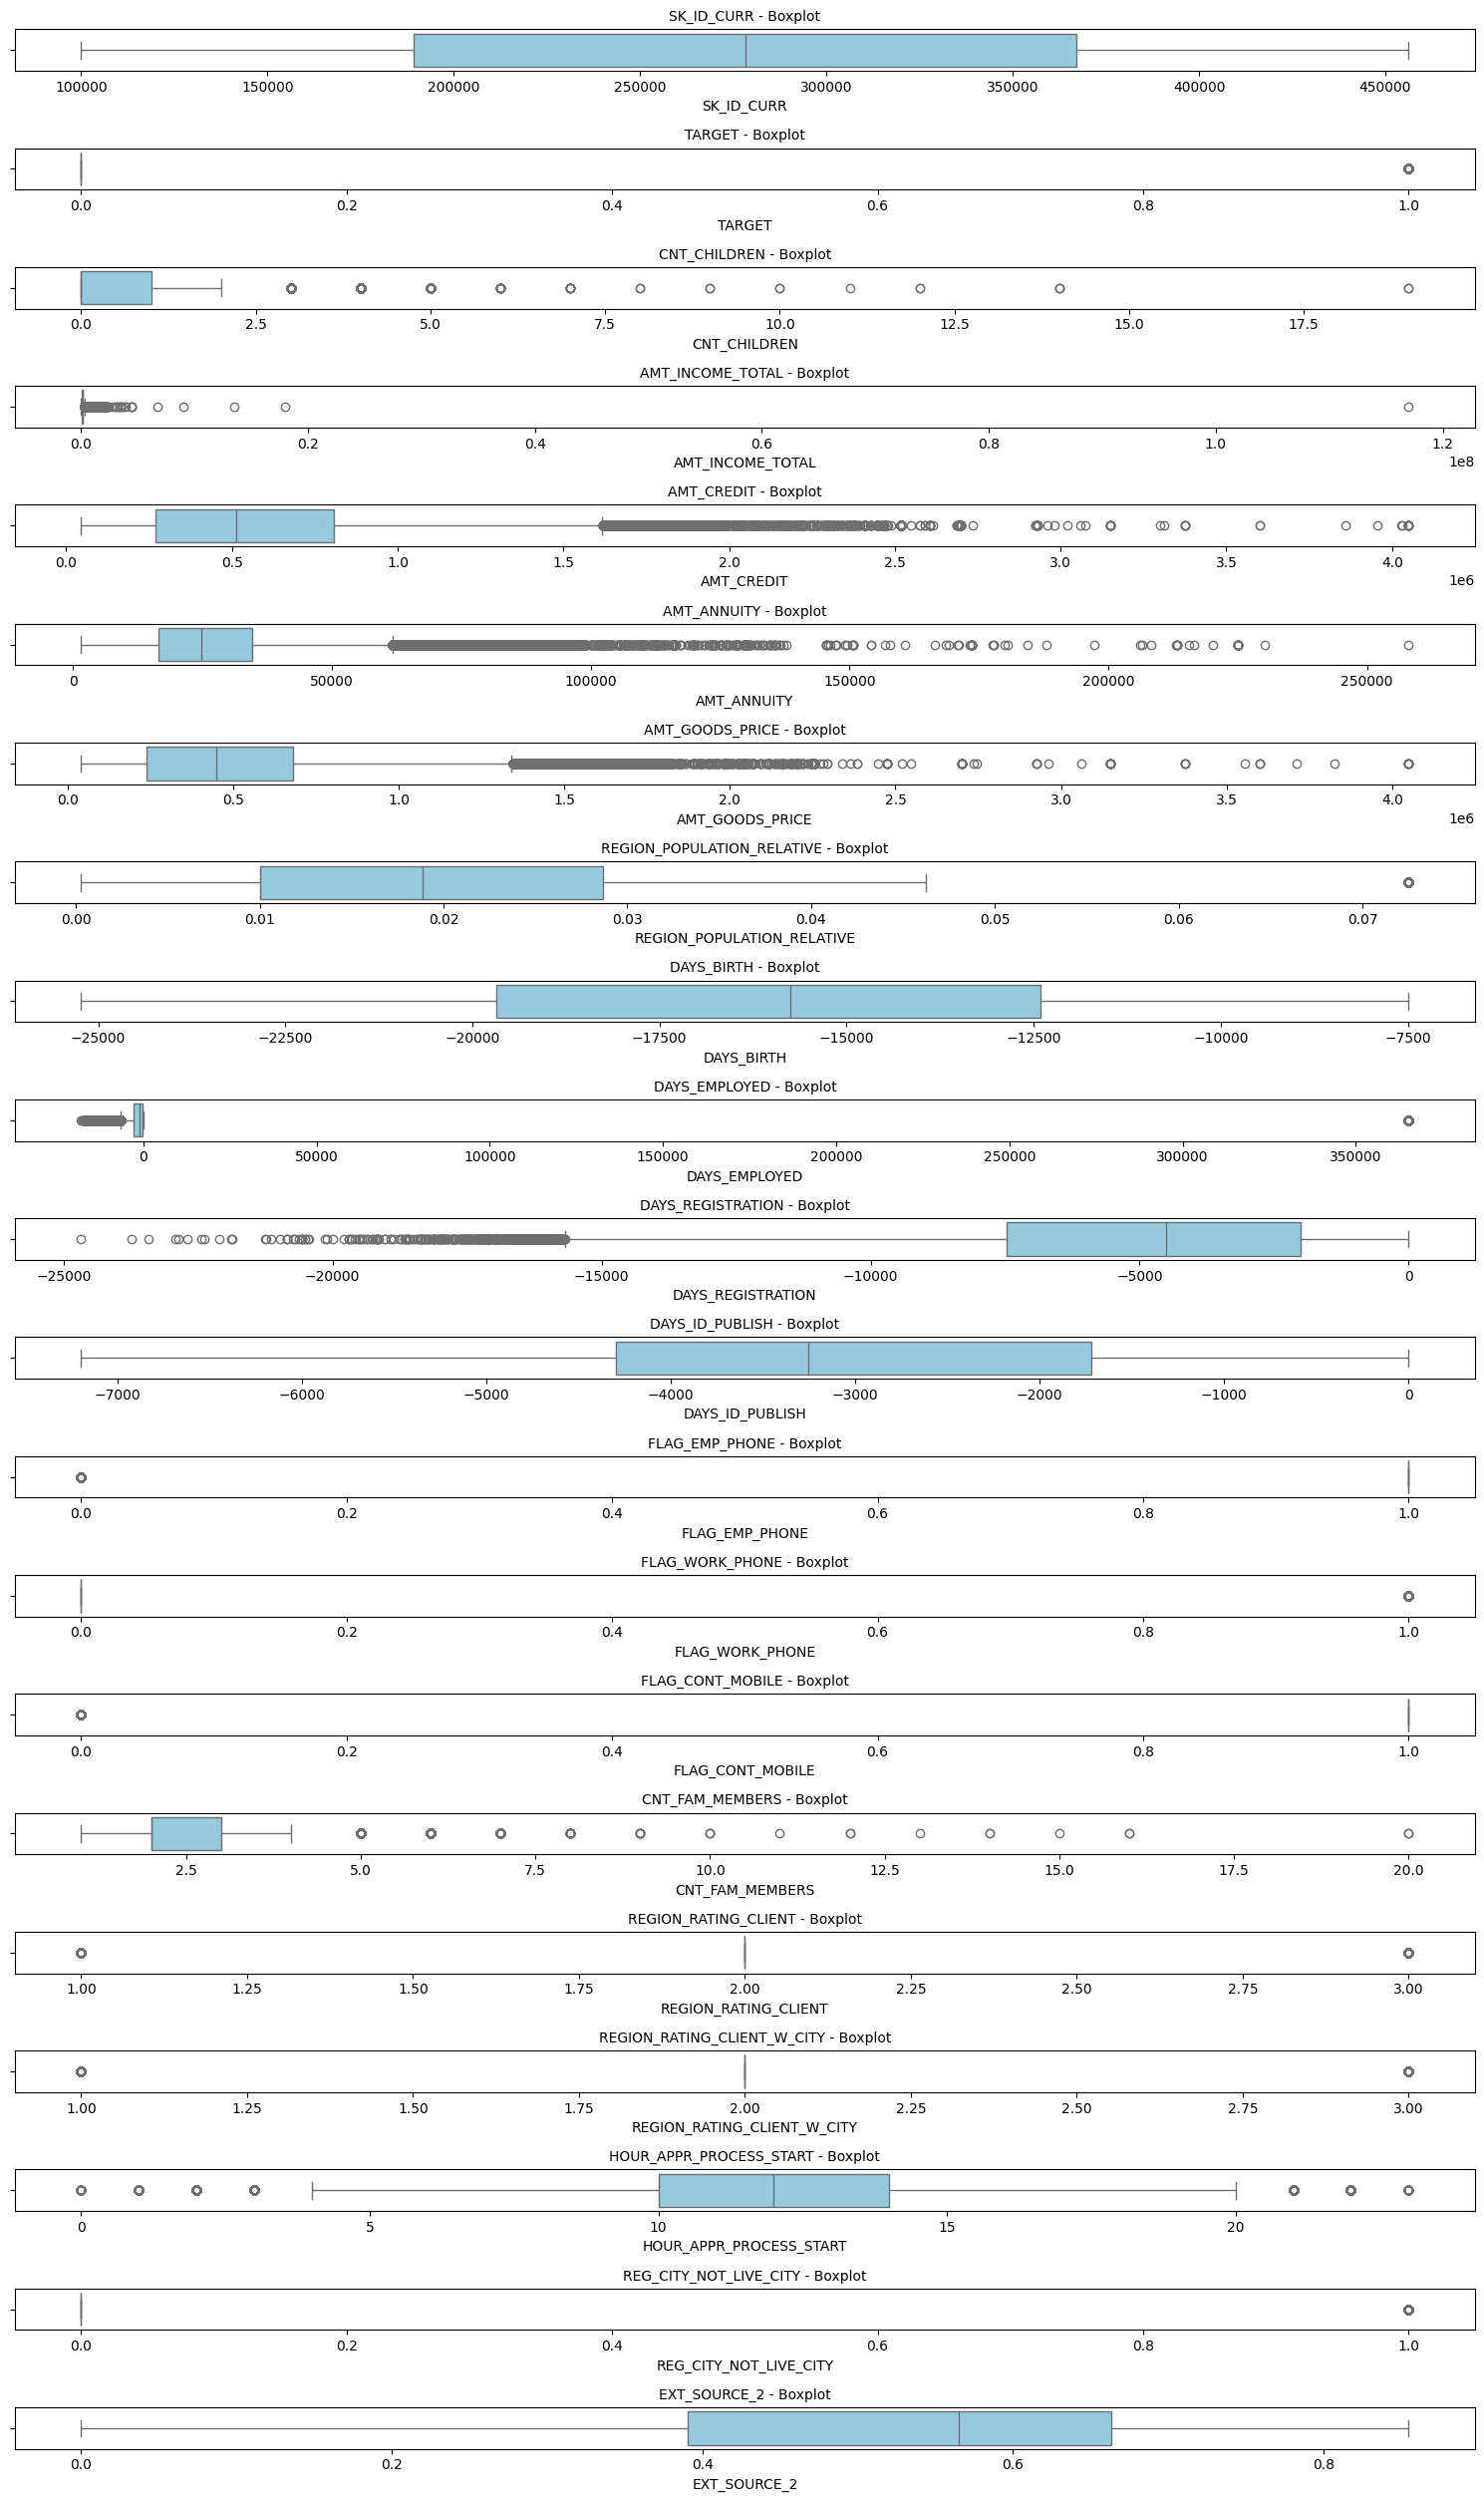

In [15]:
num_cols = df.select_dtypes(include="number").columns

# Set the figure size based on number of columns
plt.figure(figsize=(15, len(num_cols) * 1.2))

# Loop through each numerical column and create a boxplot
for i, col in enumerate(num_cols, 1): 
 plt.subplot(len(num_cols), 1, i)
 sns.boxplot(x=df[col], orient='h', color='skyblue')
 plt.title(f"{col} - Boxplot", fontsize=10)
 plt.tight_layout()

# Display all plots
plt.show()

In [16]:
df.drop_duplicates(inplace=True)

num_cols = df.select_dtypes("number").columns

for col in num_cols:
  q1=df[col].quantile(0.25)
  q3=df[col].quantile(0.75)
  iqr=q3-q1
  upper_fence=q3+1.5*iqr
  lower_fence=q1-1.5*iqr
  lower_outliers=df[df[col]<lower_fence][col].values
  upper_outliers=df[df[col]>upper_fence][col].values
  df[col].replace(lower_outliers,lower_fence,inplace=True)
  df[col].replace(upper_outliers,upper_fence,inplace=True)

C:\Users\Incorta\AppData\Local\Temp\ipykernel_8504\1369542836.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace(lower_outliers,lower_fence,inplace=True)
C:\Users\Incorta\AppData\Local\Temp\ipykernel_8504\1369542836.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

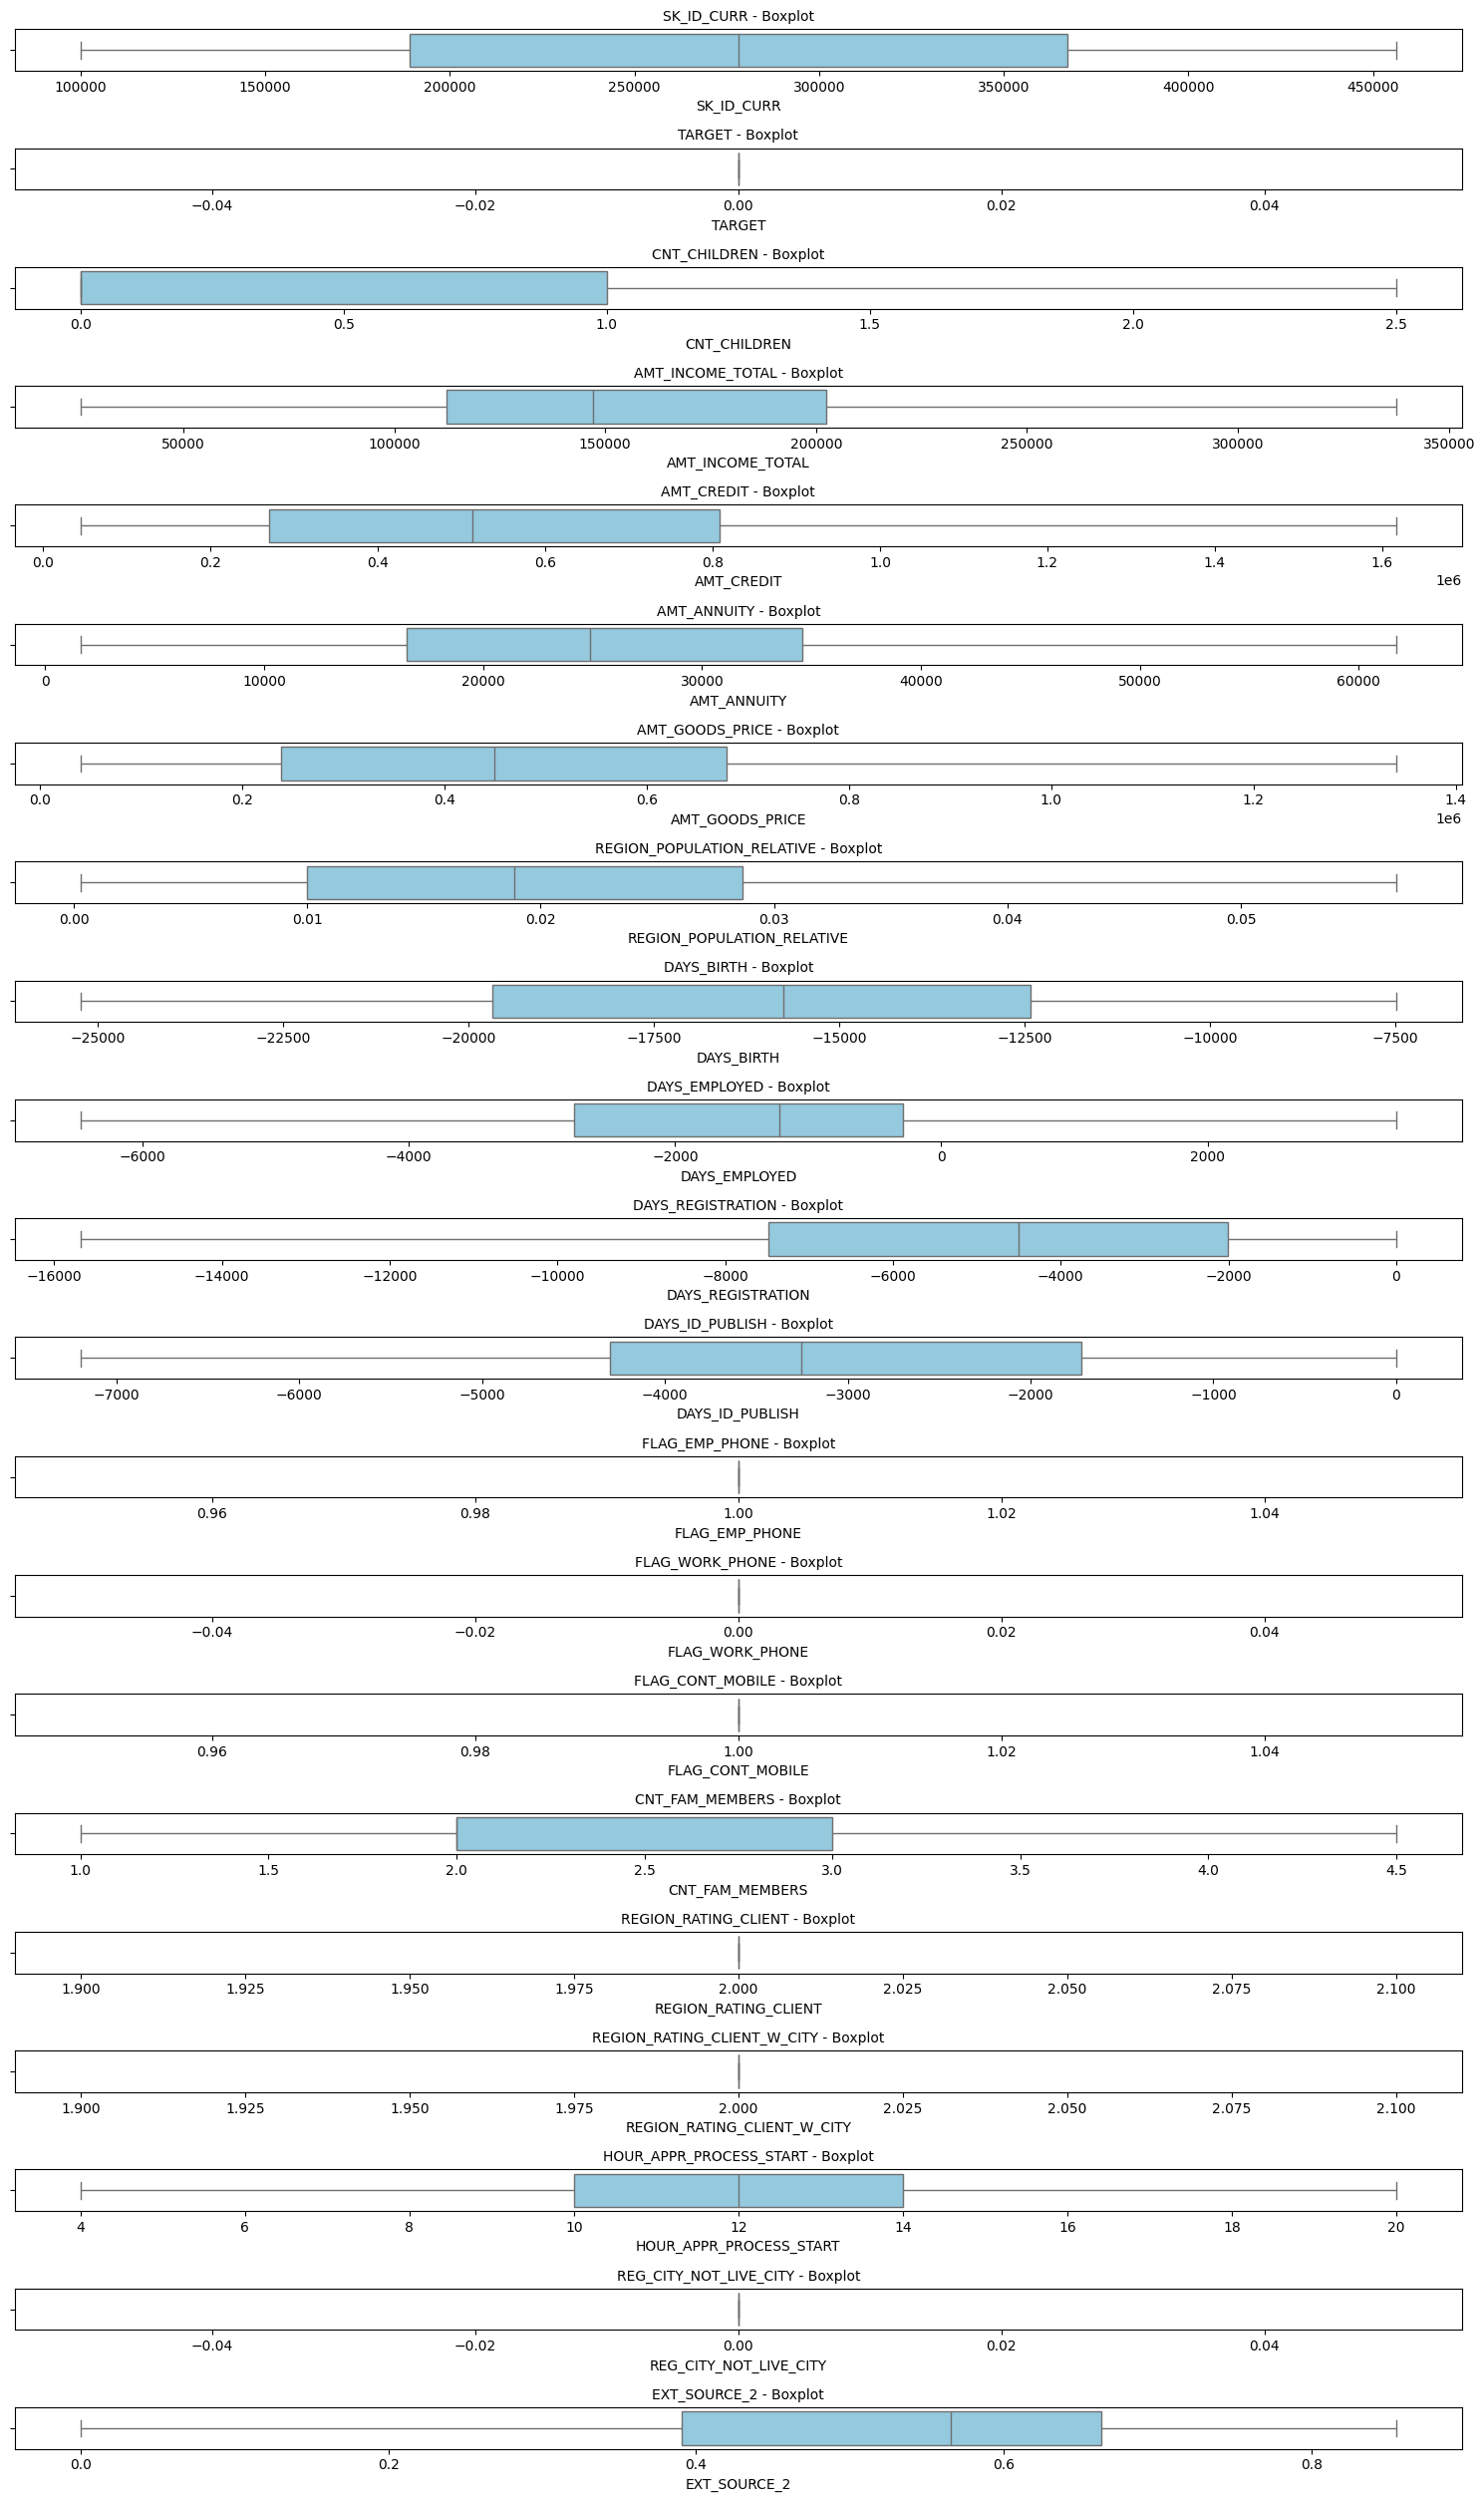

In [17]:
num_cols = df.select_dtypes(include="number").columns

# Set the figure size based on number of columns
plt.figure(figsize=(15, len(num_cols) * 1.2))

# Loop through each numerical column and create a boxplot
for i, col in enumerate(num_cols, 1): 
 plt.subplot(len(num_cols), 1, i)
 sns.boxplot(x=df[col], orient='h', color='skyblue')
 plt.title(f"{col} - Boxplot", fontsize=10)
 plt.tight_layout()

# Display all plots
plt.show()

In [32]:
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [42]:
X= df.drop(columns=['TARGET'])
y= df['TARGET']

In [43]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder



# Encode categorical columns
df_encoded = df.copy()
label_enc = LabelEncoder()

for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = label_enc.fit_transform(df_encoded[col])

# Check TARGET values
print(df_encoded['TARGET'].value_counts())


TARGET
0    282686
1     24825
Name: count, dtype: int64


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined as your features and target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming X_train is a pandas DataFrame
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Make sure both train and test have same columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [44]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Features and Target
X = df_encoded.drop('TARGET', axis=1)
y = df_encoded['TARGET']

# Apply SMOTE to balance
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

# Confirm balancing
print(y_resampled.value_counts())

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


TARGET
1    282686
0    282686
Name: count, dtype: int64


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.utils import class_weight
import numpy as np

In [49]:
df['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [50]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_encoded.drop('TARGET', axis=1)
y = df_encoded['TARGET']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(y_resampled.value_counts())

TARGET
1    282686
0    282686
Name: count, dtype: int64


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
model=DecisionTreeClassifier()
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [53]:
y_pred = model.predict(X_test)

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=["0", "1"]))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91     56554
           1       0.12      0.14      0.13      4949

    accuracy                           0.84     61503
   macro avg       0.52      0.52      0.52     61503
weighted avg       0.86      0.84      0.85     61503



In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
model=RandomForestClassifier()
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [57]:
y_pred = model.predict(X_test)

In [58]:
from xgboost import XGBClassifier
from sklearn.utils import class_weight
import numpy as np

    # Assuming X and y are your features and target
    # Calculate class weights
weights = class_weight.compute_class_weight('balanced', classes=np.unique(y), y=y)
scale_pos_weight_value = weights[0] / weights[1] # For binary classification, assuming 0 is majority and 1 is minority

model = XGBClassifier(scale_pos_weight=scale_pos_weight_value)
model.fit(X, y)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


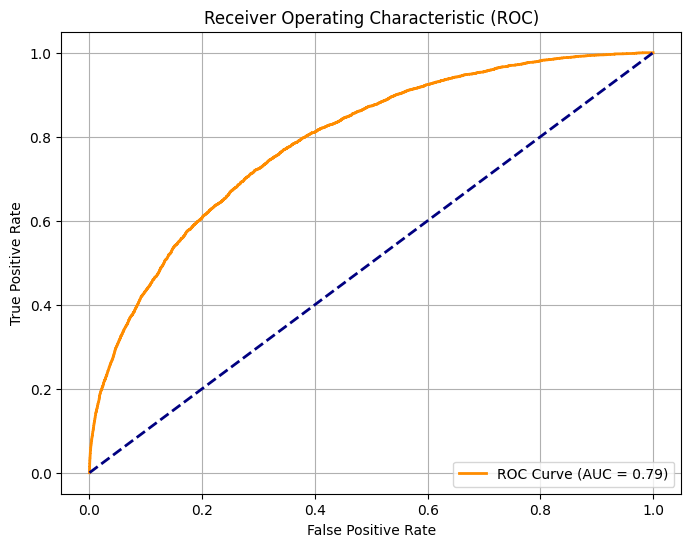

In [60]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities
y_prob = model.predict_proba(X_test)[:, 1]  # Probability for class 1

# Compute ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


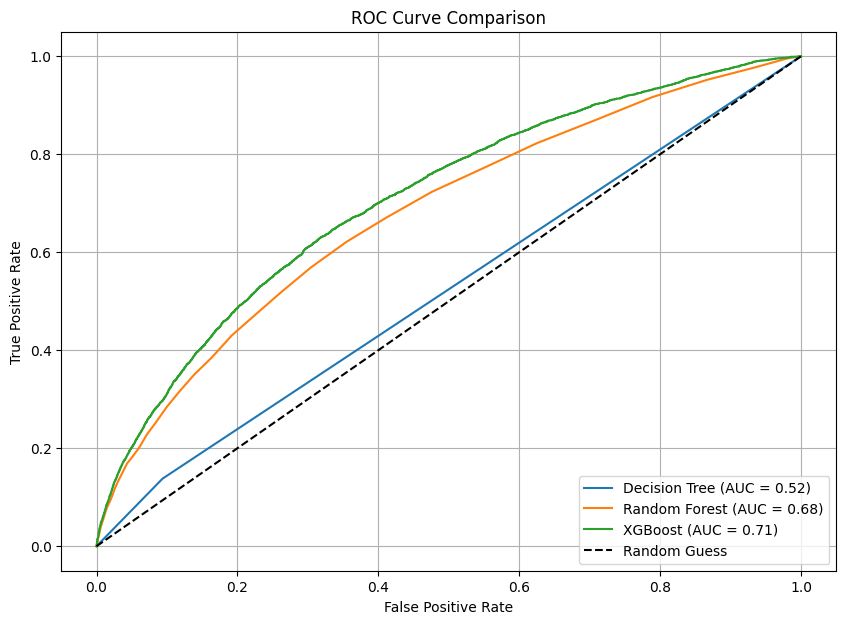

In [66]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get probabilities
y_prob_dt = dt.predict_proba(X_test)[:, 1]
y_prob_rf = rf.predict_proba(X_test)[:, 1]
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

# Compute FPR, TPR, AUC
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC curves
plt.figure(figsize=(10, 7))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [63]:
from sklearn.metrics import roc_auc_score

# Get predicted probabilities for class 1
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate AUC
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc_score:.2f}")


AUC: 0.79


In [64]:


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Train Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Train Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Train XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)


auc_dt = roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])
auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
auc_xgb = roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])

print(f"Decision Tree AUC: {auc_dt:.2f}")
print(f"Random Forest AUC: {auc_rf:.2f}")
print(f"XGBoost AUC: {auc_xgb:.2f}")


Decision Tree AUC: 0.52
Random Forest AUC: 0.68
XGBoost AUC: 0.71


In [ ]:
#web scrabbing